In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import latools as la
import pandas as pd
import uncertainties as un
import uncertainties.unumpy as unp
from scipy import stats

In [2]:
dir = 'dev_boron/fluids_messy'
file = dir + '/20230303_001_v2_FluidTest_951.xlsx'
la.preprocessing.sanitise.Neptune_xlsx(file, 25000)

'Saved to: dev_boron/fluids_messy/20230303_001_v2_FluidTest_951.csv'

In [3]:
# from latools import preprocessing
# file = 'dev_boron/carbonates_clean/20220223_001_v2_CarbTest_Standards.csv'
# preprocessing.split.by_regex(file, outdir=dir, split_pattern='Neptune Analysis Data Report', fname_pattern='Block-View - (Block: \d+).*')



In [44]:
dataformat = {
    "genfromtext_args": {
    "delimiter": ",",
    },
    "column_id": {
        "delimiter": ",",
        "timecolumn": 0,
        "name_row": 0,
        "pattern": "([0-9]{1,3}[A-z]{1,3}|[0-9.]{2,})"
    }}

laserlog = dir + '/20230303_FluidTest_951_log_20230303_142555.csv'
csv_file = file = dir + '/20230303_001_v2_FluidTest_951.csv'

In [45]:
dat = la.analyse(csv_file, dataformat=dataformat, srm_identifier='NIST', srm_file='latools/resources/SRM_GeoRem_Preferred_100523.csv', file_structure='laserlog', file_structure_kwargs={'laserlog_file': laserlog, 'on_pad': [5, 5], 'off_pad': [5, 15]})

# dat.trace_plots(ranges=True)

--------------------------------------------------------------------------------
Starting analysis:
  Using custom srm_file (latools/resources/SRM_GeoRem_Preferred_100523.csv)
  Using custom dataformat dict


0it [00:00, ?it/s]

Loading Data:
  31 Data Files Loaded: 6 standards, 25 samples
Analytes: 9.95 10.115 10B 10.54 11B
  Internal Standard: None


In [46]:
dat.bkg_calc_interp1d(kind=0)

Calculating Analyte Backgrounds:   0%|          | 0/5 [00:00<?, ?it/s]

Plotting backgrounds:   0%|          | 0/5 [00:00<?, ?it/s]

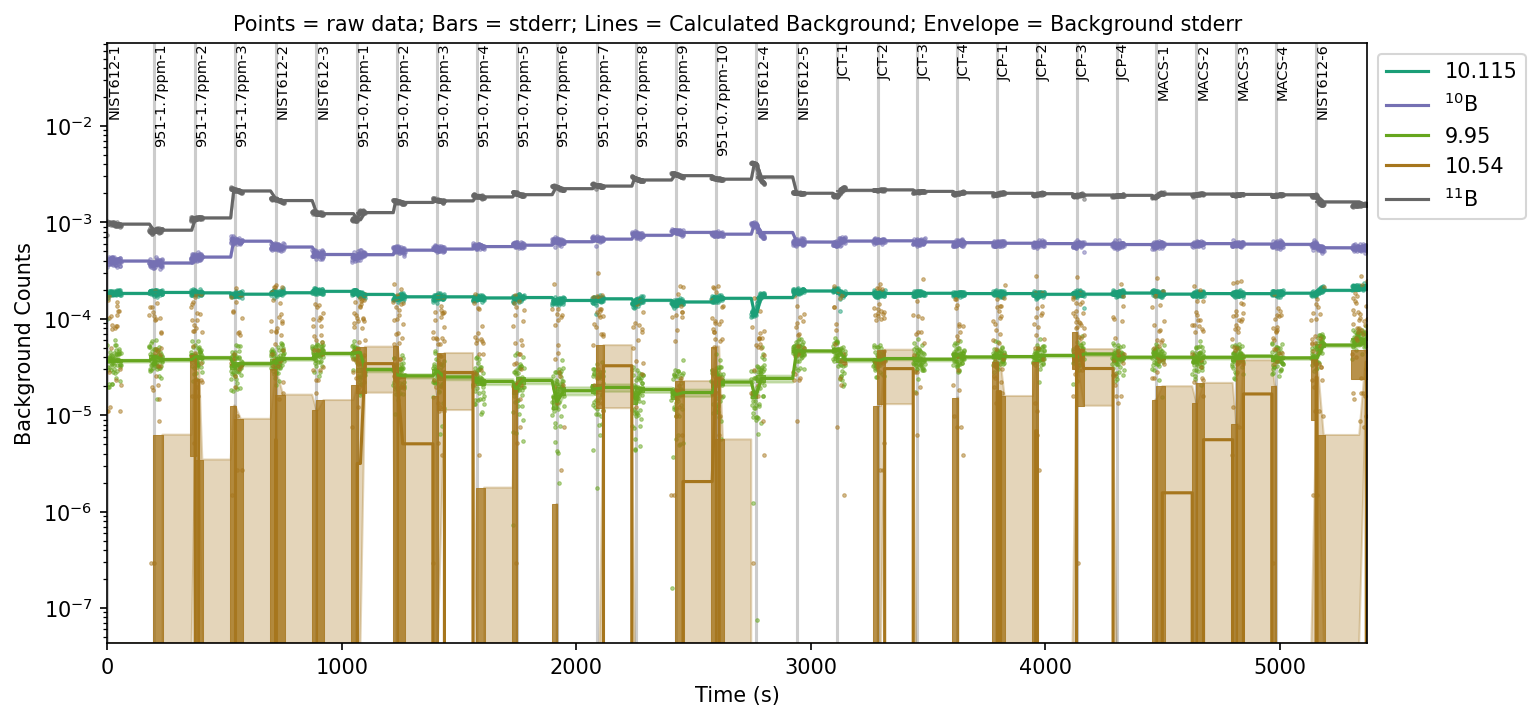

In [47]:
fig, ax = dat.bkg_plot()

In [48]:
dat.bkg_subtract()

Background Subtraction:   0%|          | 0/31 [00:00<?, ?it/s]

In [49]:
dat.ratio(internal_standard='10B', analytes='11B')

Ratio Calculation:   0%|          | 0/31 [00:00<?, ?it/s]

In [50]:
dat.calibrate(drift_correct='gauss_weighted', srms_used='NIST612', gauss_weight_fwhm=700, reload_srm_database=True)

Applying Calibrations:   0%|          | 0/31 [00:00<?, ?it/s]

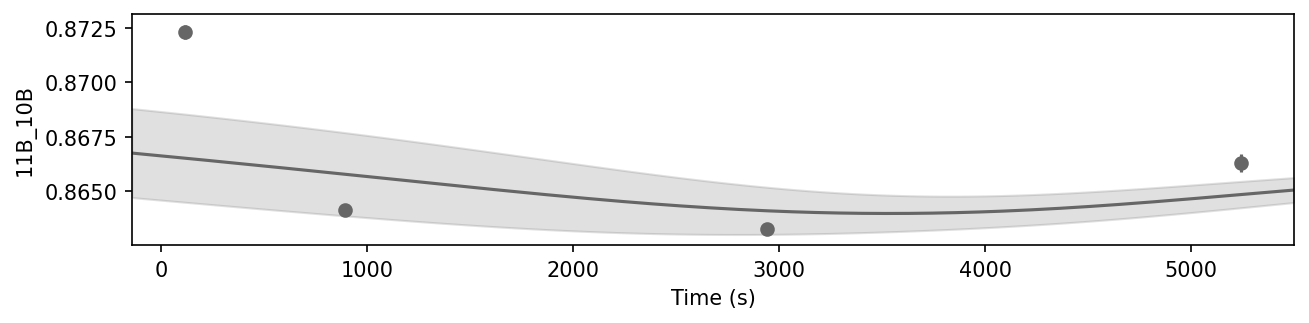

In [51]:
la.plot.drift.mass_bias(dat, analyte_ratios='11B_10B')

In [79]:
dat.make_subset(match='ppm', name='test_samples')

***NOPE***
A subset containing those samples already exists, and is called 'test_samples'.
A new subset has not been created. I suggest you use the existing one. If you'd
like to go ahead anyway, set `force=True` to make a new subset with your
provided name.


'test_samples'

In [141]:
dat.filter_clear()
dat.filter_gradient_threshold(analyte='11B_10B', subset='test_samples', threshold=0.02, win=21)
dat.filter_on('below')

Gradient Threshold Filter:   0%|          | 0/13 [00:00<?, ?it/s]

In [142]:
dat.filter_defragment(threshold=15, mode='exclude', subset='test_samples')
dat.filter_on('defrag')

In [143]:
dat.filter_status()

11B_10B 11B_10.115
subset       N filter                                  
test_samples 0 11B_10B_gthresh_below    True       True
               11B_10B_gthresh_above   False      False
             1 defrag_exclude_15        True       True

In [144]:
dat.filter_effect(analytes='11B_10B')

Calculating Stats:   0%|          | 0/25 [00:00<?, ?it/s]

Calculating Stats:   0%|          | 0/25 [00:00<?, ?it/s]

,filtered_mean,filtered_std,mean_ratio,std_ratio,unfiltered_mean,unfiltered_std
,11B_10B,11B_10B,11B_10B,11B_10B,11B_10B,11B_10B
951-1.7ppm-1,3.923235,0.003292,0.906821,0.001440,4.326359,2.286721
951-1.7ppm-2,3.924001,0.003734,0.917090,0.001434,4.278752,2.604360
951-1.7ppm-3,3.863004,0.341361,1.081215,0.038327,3.572837,8.906577
951-0.7ppm-1,3.979389,0.032793,1.713884,0.001684,2.321855,19.476556
951-0.7ppm-2,4.019461,0.166869,1.181673,0.013910,3.401499,11.996194
951-0.7ppm-3,3.986666,0.120059,0.372125,0.001868,10.713231,64.264219
951-0.7ppm-4,3.999275,0.044110,0.940965,0.003773,4.250183,11.690967
951-0.7ppm-5,4.005016,0.061594,0.924061,0.008598,4.334146,7.163784
951-0.7ppm-6,3.990409,0.128068,1.296712,0.016971,3.077330,7.546306


In [145]:
dat.gradient_plots(analytes='11B_10B', subset='test_samples', filt=True, focus_stage='calibrated')

Drawing Plots:   0%|          | 0/13 [00:00<?, ?it/s]

In [146]:
dat.trace_plots(ranges=True, analytes='11B_10B', focus_stage='calibrated', filt=True)

Drawing Plots:   0%|          | 0/31 [00:00<?, ?it/s]

In [52]:
dat.ratio(internal_standard='10.115', analytes='11B')


Ratio Calculation:   0%|          | 0/31 [00:00<?, ?it/s]

***NOPE***
A subset containing those samples already exists, and is called
'b_correction_srms'. A new subset has not been created. I suggest you use the
existing one. If you'd like to go ahead anyway, set `force=True` to make a new
subset with your provided name.


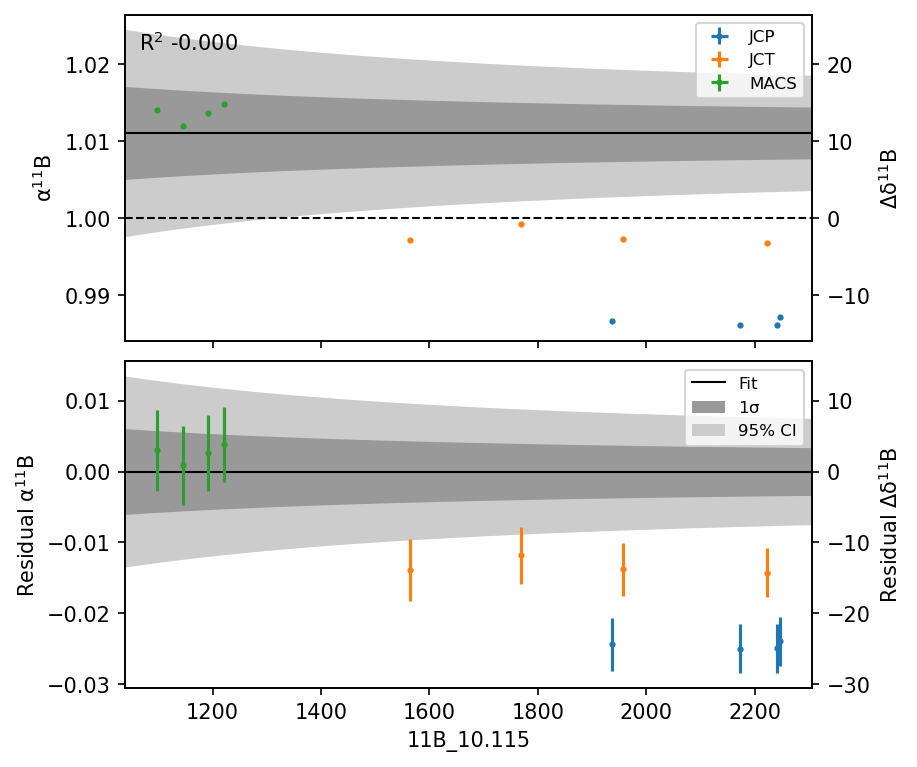

In [147]:
b_correction_srms = ['MACS', 'JCT', 'JCP']

dat.correct_d11b_Ca_offset(xvar='11B_10.115', b_correction_srms=b_correction_srms, yvar='11B_10B', uncertainty_metric='SE')


In [148]:
from latools.processes.b_isotopes import R_to_delta

Text(0, 0.5, 'Corrected $\\delta^{11}B$')

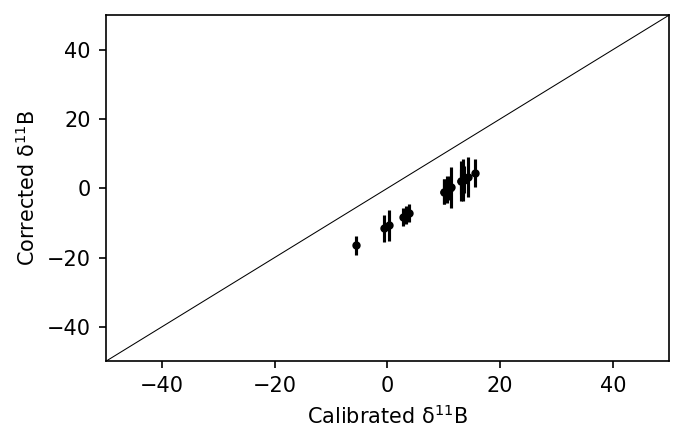

In [149]:
fig, ax = plt.subplots()

for s, d in dat.data.items():
    x = R_to_delta(np.nanmean(d.data['calibrated']['11B_10B']))
    y = R_to_delta(np.nanmean(d.data['d11b_corrected']['11B_10B']))
    
    ax.errorbar(x.nominal_value, y.nominal_value, xerr=x.std_dev, yerr=y.std_dev, fmt='o', c='k', markersize=3)

lim = -50, 50
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim, lim, c='k', lw=0.5)

ax.set_xlabel('Calibrated $\delta^{11}B$')
ax.set_ylabel('Corrected $\delta^{11}B$')

# ax.set_xlim(3.8, 4.8)
# ax.set_ylim(3.8, 4.8)

In [175]:
# corrected data
dat.sample_stats(analytes='11B_10B', stats=['mean', 'se'])
s = dat.getstats()

sdf = pd.DataFrame(index=s.loc['mean'].index, columns=['11B_10B'], data=unp.uarray(s.loc['mean',:], s.loc['se',:]))

sdf['d11B'] = R_to_delta(sdf['11B_10B'])
sdf.index = sdf.index.droplevel('rep')

# uncorrected data
dat.sample_stats(analytes='11B_10B', focus_stage='calibrated', stats=['mean', 'se'])
s = dat.getstats()

usdf = pd.DataFrame(index=s.loc['mean'].index, columns=['11B_10B'], data=unp.uarray(s.loc['mean',:], s.loc['se',:]))
usdf['d11B'] = R_to_delta(usdf['11B_10B'])
usdf.index = usdf.index.droplevel('rep')

csdf = pd.concat({'corrected': sdf, 'uncorrected': usdf}, axis=1, join='inner')

# combined data
sdf_sep = pd.DataFrame(index=usdf.index, columns=pd.MultiIndex.from_product([['corrected', 'uncorrected'], usdf.columns, ['mean', 'se']]))

sdf_sep.loc[:, pd.IndexSlice['corrected', :, 'mean']] = unp.nominal_values(usdf)
sdf_sep.loc[:, pd.IndexSlice['corrected', :, 'se']] = unp.std_devs(usdf)

sdf_sep.loc[:, pd.IndexSlice['uncorrected', :, 'mean']] = unp.nominal_values(sdf)
sdf_sep.loc[:, pd.IndexSlice['uncorrected', :, 'se']] = unp.std_devs(sdf)

Calculating Stats:   0%|          | 0/25 [00:00<?, ?it/s]

Calculating Stats:   0%|          | 0/25 [00:00<?, ?it/s]

In [176]:
csdf = csdf.drop('951-0.7ppm-10')

Text(0, 0.5, 'uncorrected $\\delta^{11}B$')

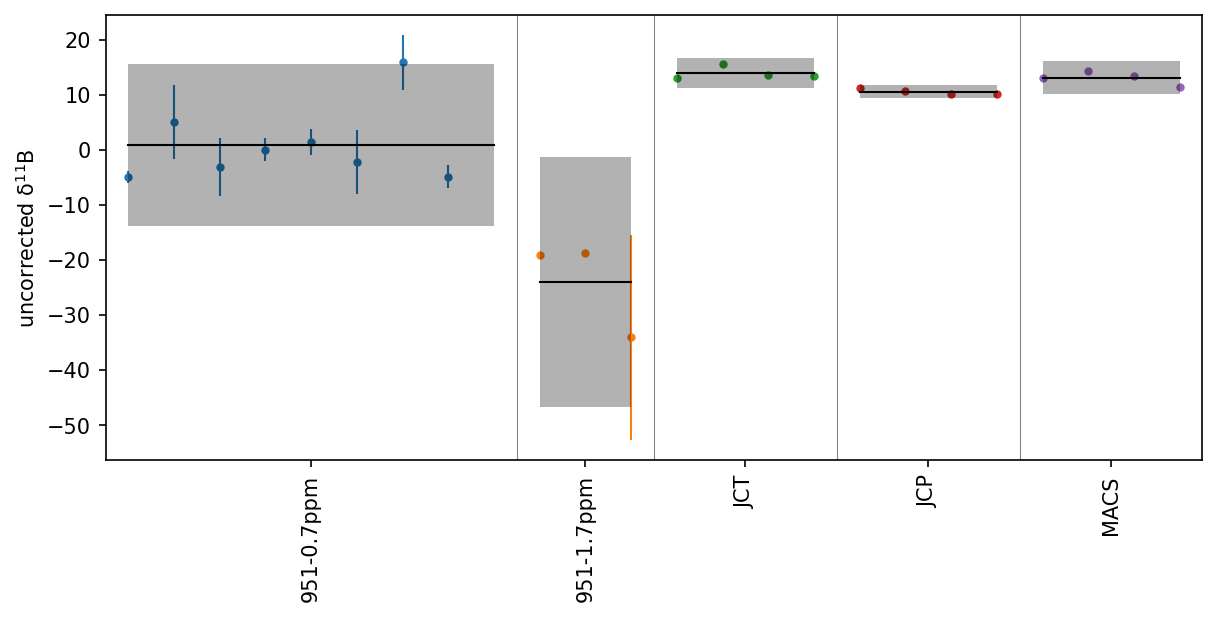

In [179]:
sample_types = [
    '951-0.7ppm',
    '951-1.7ppm',
    'JCT',
    'JCP',
    'MACS',
]

fig, ax = plt.subplots(constrained_layout=True, figsize=(8,4))

x0 = 0
spacing = 0.3
padding = 0.3

lines = []
ticks = []

mode = 'uncorrected'

for st in sample_types:
    ind = csdf.index.str.contains(st)
    sub = csdf.loc[ind, mode]
    n = sub.shape[0]
    
    x = x0 + np.arange(n) * spacing
    y = sub['d11B']
    
    ymean = np.nanmean(sub['d11B'])
    ystd = np.nanstd(unp.nominal_values(sub['d11B']))
    
    ax.errorbar(x, unp.nominal_values(y), yerr=unp.std_devs(y), fmt='o', markersize=3, lw=1, zorder=-1)
    ax.plot(x, [ymean.nominal_value] * n, c='k', lw=1)
    
    ci_m = stats.t.interval(0.95, n)[1]
    ax.fill_between(x, [ymean.nominal_value - ystd * ci_m] * n, [ymean.nominal_value + ystd * ci_m] * n, color='k', alpha=0.3, lw=0)
    # ax.fill_between(x, [ymean.nominal_value - ymean.std_dev * ci_m] * n, [ymean.nominal_value + ymean.std_dev * ci_m] * n, color='k', alpha=0.3, lw=0)

    ticks.append(x.mean())
    
    lines.append(max(x) + padding / 2)
    x0 = max(x) + padding

for line in lines[:-1]:
    ax.axvline(line, c='k', lw=0.5, alpha=0.5)
ax.set_xlim(-padding/2, x0-padding/2)

ax.set_xticks(ticks)
ax.set_xticklabels(sample_types, rotation=90)

# ax.set_ylim(-20, 50)

ax.set_ylabel(mode + ' $\delta^{11}B$')

In [62]:
sdf_sep

11B_10B                    d11B              
                    mean        std         mean           std
sample                                                        
951-1.7ppm-1    4.326359   2.286721    69.908935    565.506445
951-1.7ppm-2    4.278752   2.604360    58.135782    644.058394
951-1.7ppm-3    3.572837   8.906577  -116.437085   2202.597453
951-0.7ppm-1    2.321855  19.476556  -425.805035   4816.554150
951-0.7ppm-2    3.401499  11.996194  -158.808844   2966.659998
951-0.7ppm-3   10.713231  64.264219  1649.383036  15892.547957
951-0.7ppm-4    4.250183  11.690967    51.070701   2891.177430
951-0.7ppm-5    4.334146   7.163784    71.834714   1771.604515
951-0.7ppm-6    3.077330   7.546306  -238.976018   1866.202336
951-0.7ppm-7    5.668316  10.528938   401.775201   2603.807466
951-0.7ppm-8    3.514147   7.391129  -130.951077   1827.826828
951-0.7ppm-9    3.572048   6.095181  -116.632116   1507.338820
951-0.7ppm-10   5.304399   4.101297   311.778344   1014.251219
JCT-1           4.051587   0.008286     1.957861      2.049069
JCT-2           4.061526   0.010044     4.415699      2.483806
JCT-3           4.053509   0.009777     2.433210      2.417764
JCT-4           4.053223   0.009488     2.362421      2.346483
JCP-1           4.043850   0.008227     0.044556      2.034597
JCP-2           4.042005   0.007895    -0.411812      1.952509
JCP-3           4.039678   0.007087    -0.987176      1.752623
JCP-4           4.039803   0.007823    -0.956262      1.934606
MACS-1          4.051592   0.016164     1.959214      3.997351
MACS-2          4.056636   0.019432     3.206548      4.805598
MACS-3          4.053235   0.019116     2.365537      4.727440
MACS-4          4.044825   0.019403     0.285625      4.798482